# Unstructured Data (Part I)

For this lecture you are going to need to install the following libraries on your machine:

1. numpy
2. matplotlib
6. sklearn
3. scipy
5. sckit-image
4. opencv-python

In [36]:
import numpy as np
import cv2 as cv
import gzip

import matplotlib.pyplot as plt
import matplotlib.image as plti

from urllib.request import urlopen
from io import BytesIO

from scipy import ndimage
from scipy.io import loadmat

from skimage import measure, data, color, morphology

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Image Data

A black-white image is an integer matrix whose individual cells are called *pixels* whose values range from 0 (black) to 255 (white)

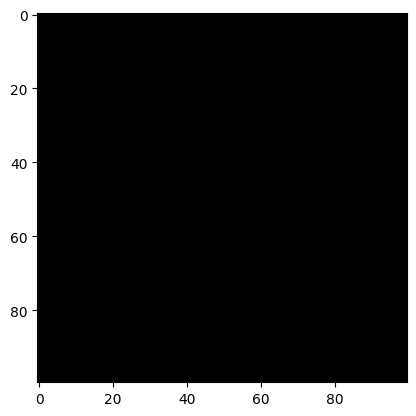

In [2]:
black = np.zeros((100,100))
plt.imshow(black, cmap='gray')

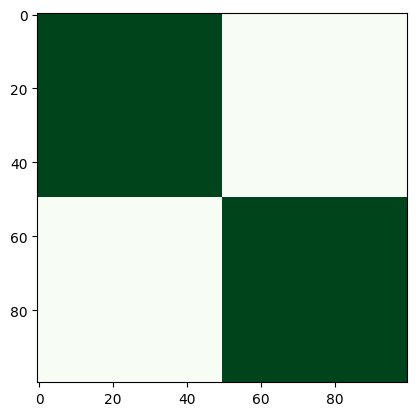

In [3]:
white = np.zeros((100,100))
white[:50,:50] = 255
white[50:,50:] = 255
plt.imshow(white, cmap='Greens')

A color image, on the other hand, consists of three layers: [Source:](https://www.geeksforgeeks.org/matlab-rgb-image-representation/)

![RGB Layers](https://media.geeksforgeeks.org/wp-content/uploads/Pixel.jpg)

The following image is taken from [here](https://justbirding.com/most-colorful-birds/)

(548, 768, 3)


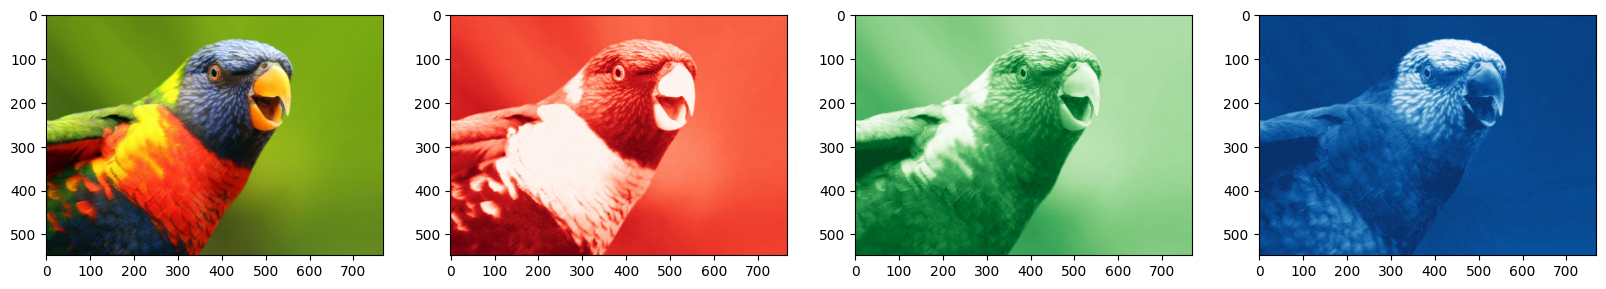

In [5]:
bird = plti.imread('./images/bird.jpg')
print(bird.shape)
fig, ax = plt.subplots(ncols=4, figsize=(20,8))
ax[0].imshow(bird, cmap='gray')
ax[1].imshow(bird[:,:,0], cmap='Reds_r')
ax[2].imshow(bird[:,:,1], cmap='Greens_r')
ax[3].imshow(bird[:,:,2], cmap='Blues_r')

For a black and white images, theoretically you don't have to worry about the RGB layers since they contain only one layer. But most b/w images these days also come with RGB layers. [The image below is taken from [here](https://www.theguardian.com/world/2020/mar/03/turkish-president-ataturk-demands-purge-of-religion-from-politics-archive-1924).]

(372, 620, 3)


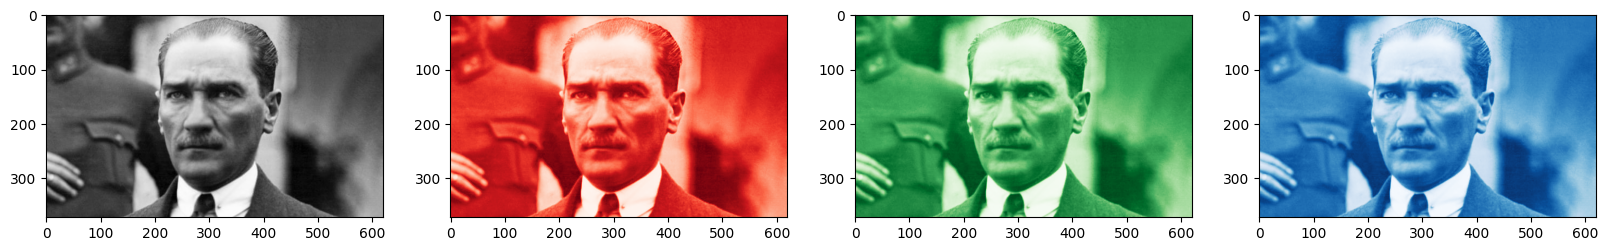

In [6]:
ataturk = plti.imread('images/ataturk.jpg')
print(ataturk.shape)
fig, ax = plt.subplots(ncols=4, figsize=(20,8))
ax[0].imshow(ataturk, cmap='gray')
ax[1].imshow(ataturk[:,:,0], cmap='Reds_r')
ax[2].imshow(ataturk[:,:,1], cmap='Greens_r')
ax[3].imshow(ataturk[:,:,2], cmap='Blues_r')

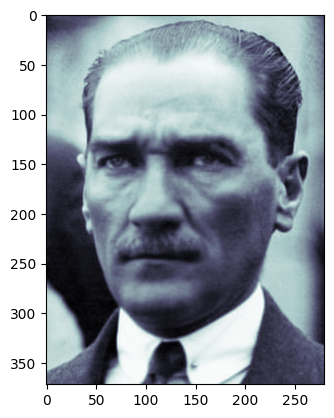

In [7]:
plt.imshow(ataturk[:,170:450,0],cmap='bone')

## Main Image Formats

However, images are not stored as binary matrix data. There are some file types and formats that deal with efficient storing, true color support, and even some simple animations.

| Abbreviation | File format                           | File extension(s)                | Summary             |  
|--------------|---------------------------------------|:--------------------------------:|:--------------------|
| GIF          | Graphics Interchange Format           | .gif                             | Good choice for simple images and animations. Prefer PNG for lossless and indexed still images, and consider WebP, AVIF or APNG for animation sequences.                                                                         |
| JPEG         | Joint Photographic Expert Group image | .jpg, .jpeg, .jfif, .pjpeg, .pjp | Good choice for lossy compression of still images (currently the most popular). Prefer PNG when more precise reproduction of the image is required. |
| PNG          | Portable Network Graphics             | .png                             | PNG is preferred over JPEG for more precise reproduction of source images, or when transparency is needed. |
| SVG          | Scalable Vector Graphics              | .svg                             | Vector image format; ideal for user interface elements, icons, diagrams, etc., that must be drawn accurately at different sizes.   |
| BMP          | Bitmap file                           | .bmp                           |  The BMP (Bitmap image) file type is most prevalent on Windows computers, and is generally used only for special cases in web apps and content. |
| TIFF         | Tagged Image File Format              | .tif, .tiff                    |TIFF is a raster graphics file format which was created to store scanned photos, although it can be any kind of image. |

The table above is taken from [here](https://developer.mozilla.org/en-US/docs/Web/Media/Formats/Image_types#common_image_file_types) with some modifications.


So, when we load an image as a matrix data, first a reader is invoked to encode the picture as an array data:


## Major Image Data Sources


1. [MNIST](http://yann.lecun.com/exdb/mnist/)
12. [Extended MNIST](https://www.kaggle.com/datasets/crawford/emnist)
13. [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
14. [Kuzushiji-MNIST](https://github.com/rois-codh/kmnist)
1. [IMAGENET](https://image-net.org/update-mar-11-2021.php)
15. [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html)
3. [Olivetti Faces Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html)
4. [Labeled Faces in the Wild Dataset](http://vis-www.cs.umass.edu/lfw/)
5. [Large-scale CelebFaces Attributes (CelebA) Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)
5. [Face Recognition Technology (FERET)](https://www.nist.gov/programs-projects/face-recognition-technology-feret)
6. [iMaterialist Competition - Fashion](https://github.com/visipedia/imat_comp)
7. [DeepFashion2 Dataset](https://github.com/switchablenorms/DeepFashion2)
5. [102 Category Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)
6. [Comprehensive Plant Image Dataset](https://www.quantitative-plant.org/dataset)
3. [Caltech-UCSD Birds Dataset](https://vision.cornell.edu/se3/caltech-ucsd-birds-200/)
5. [The Oxford-IIIT Pet Image Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/)
7. [Stanford Dog Images Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/)
8. [Fishnet Open Images Dataset](https://www.fishnet.ai/download)
9. [LEGO Bricks Image Dataset](https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images)
1. [The Comprehensive Cars (CompCars) dataset](http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html)
2. [Stanford Car Images Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html)
1. [LabelMe Dataset](http://labelme.csail.mit.edu/Release3.0/browserTools/php/dataset.php)

## Main Image Processing Libraries

1. [NumPy and SciPy](https://scipy-lectures.org/advanced/image_processing/)
2. [Scikit-Image](https://scikit-image.org/docs/stable/auto_examples/)
3. [OpenCV-Python](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
4. [PIL/ Pillow](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)


# Here is a taste of what you can do with these libraries

## A Microscope Image

This section is taken from [here](https://scipy-lectures.org/advanced/image_processing/) with some minimal modifications:

We start with a microscope image from [here](https://english.kyodonews.net/news/2021/04/162d86c9ad68-japan-universities-develop-speedier-analysis-of-coronavirus-mutations.html).

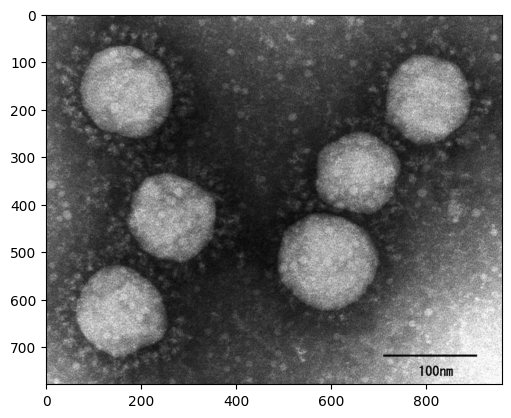

In [41]:
img = plti.imread('images/blobs.jpg')[:,:,1]/255.0
plt.imshow(img, cmap='gray')

/tmp/ipykernel_127042/1629552103.py:1: RuntimeWarning: divide by zero encountered in arctanh
  binary_img = np.arctanh(img) > 0.5


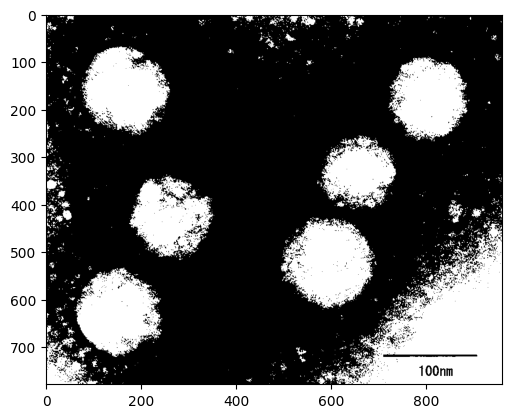

In [42]:
binary_img = np.arctanh(img) > 0.5
plt.imshow(binary_img, cmap='gray')

Now, let us remove the noise:

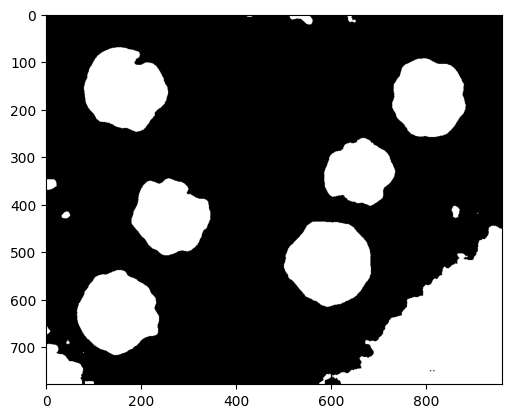

In [43]:
denoised = cv.fastNlMeansDenoising(binary_img.astype(np.uint8),None,3,7,21)
plt.imshow(denoised, cmap='gray')

Now, let us count the number of connected componets and label them:

20


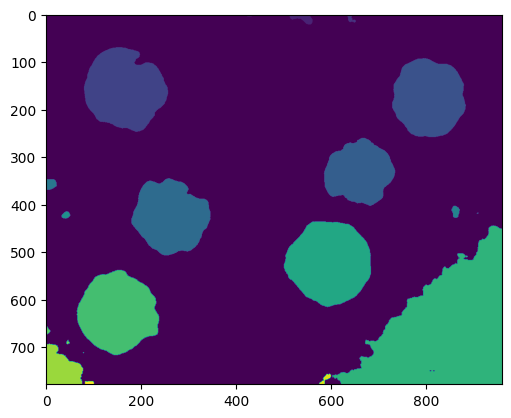

In [44]:
label_im, nb_labels = ndimage.label(denoised)
print(nb_labels)
plt.imshow(label_im) 

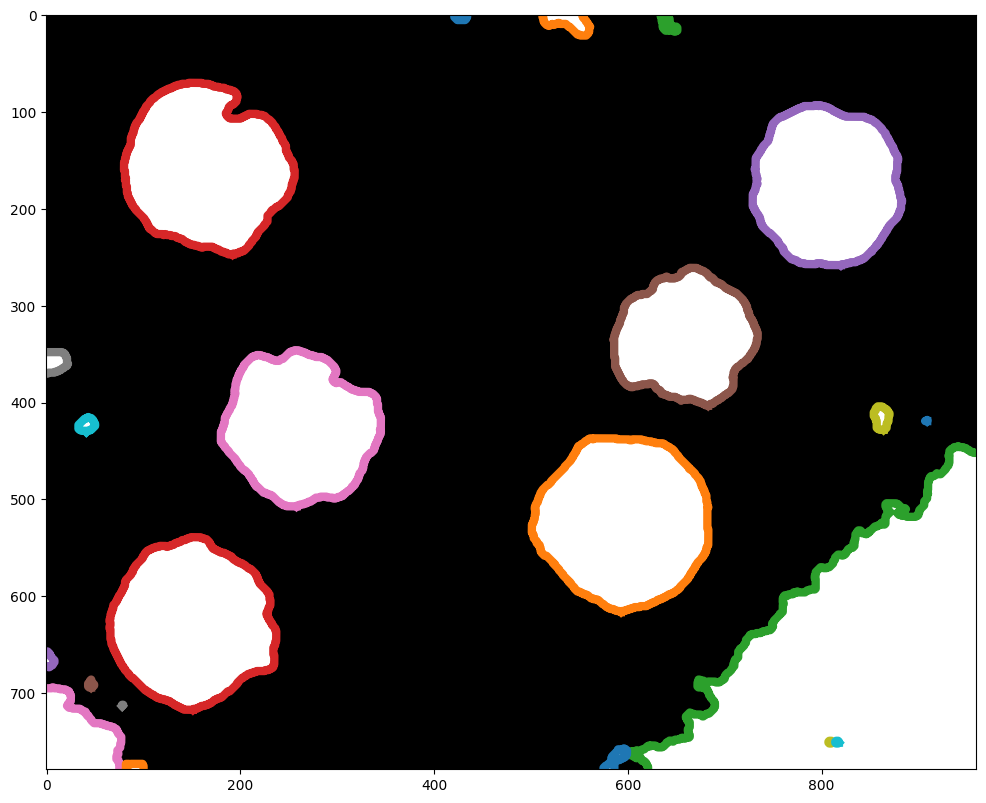

In [45]:
contours = measure.find_contours(denoised, 0.9)

fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(denoised, cmap='gray')

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=6)

## A Hubble Telescope Image

This section is taken from [here](https://scikit-image.org/docs/stable/auto_examples/filters/plot_tophat.html#sphx-glr-auto-examples-filters-plot-tophat-py) with minimal modification.

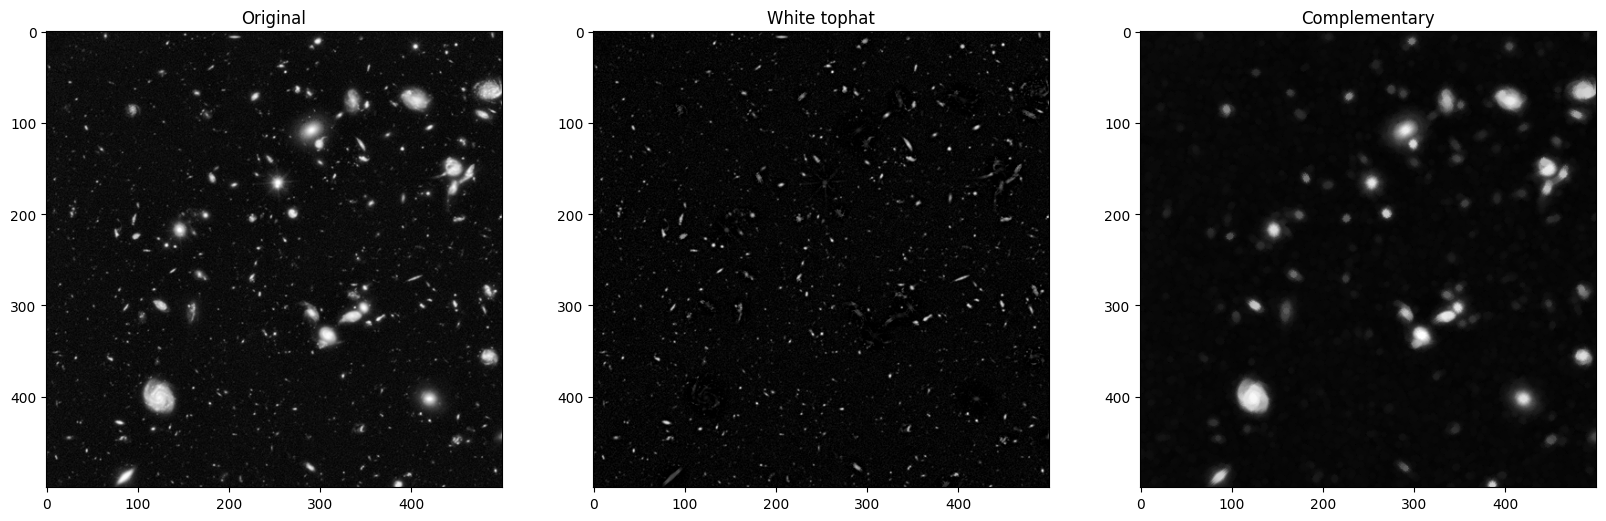

In [46]:
image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(3)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20,8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

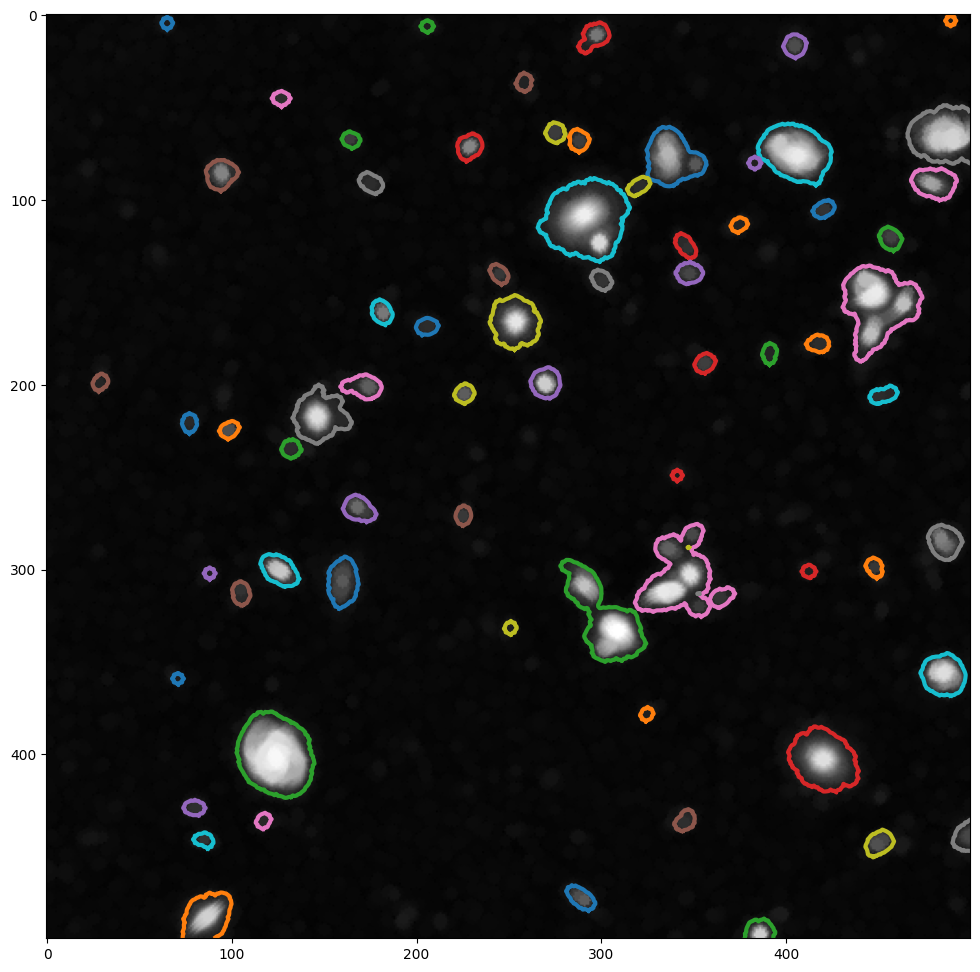

In [47]:
img = image - res
contours = measure.find_contours(img, 0.1)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(img, cmap='gray')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

## Olivetti Faces

This dataset contains face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. 

In [48]:
faces = fetch_olivetti_faces(data_home='/home/kaygun/local/data/scikit_learn_data/')

In [49]:
faces.data.shape

(400, 4096)

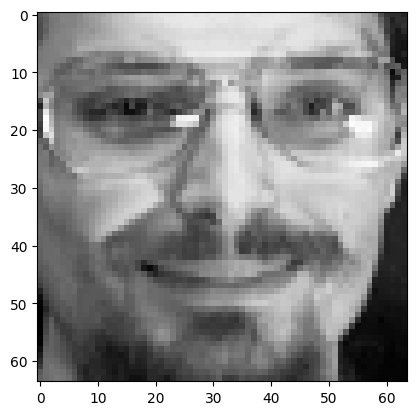

In [50]:
m = np.random.randint(400)
img = faces.data[m,:].reshape((64,64))
plt.imshow(img,cmap='gray')

In [51]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [52]:
def averageFace(m):
    i = 10*m
    data = faces.data[i:i+10,:]
    fig, ax = plt.subplots(ncols=11, figsize=(30,10))
    for j in range(10):
        ax[j].set_title(f'Original {j}')
        ax[j].imshow(data[j,:].reshape((64,64)), cmap='gray')
    ax[10].set_title('Average Face')
    plt.imshow(data.mean(axis=0).reshape((64,64)),cmap='gray')

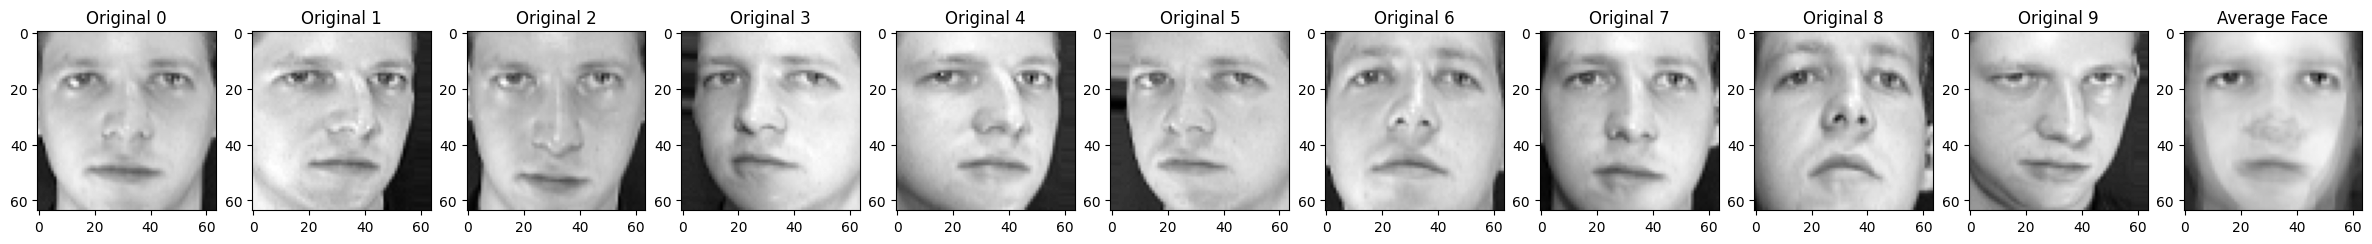

In [53]:
m = np.random.randint(40)
averageFace(0)

In [54]:
def eigenFace(m):
    i = 10*m
    data = faces.data[i:i+10,:].transpose()
    model = PCA(n_components=2)
    res = model.fit_transform(data)
    fig, ax = plt.subplots(ncols=11, figsize=(30,6))
    for j in range(10):
        ax[j].set_title(f'Original {j}')
        ax[j].imshow(data[:,j].reshape((64,64)), cmap='gray')
    ax[10].set_title('Eigen Face')
    plt.imshow(res[:,0].reshape((64,64)),cmap='gray_r')

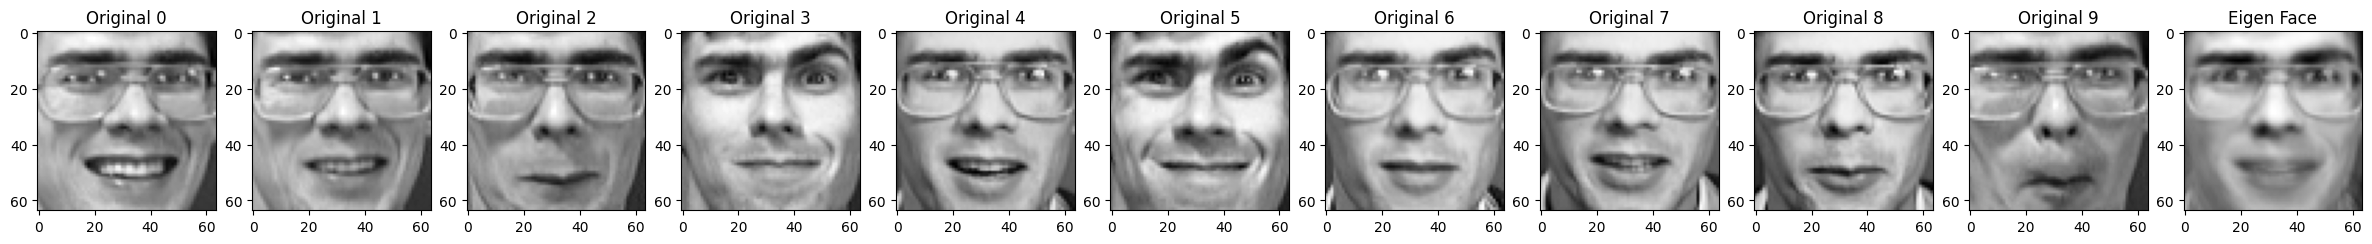

In [55]:
m = np.random.randint(40)
eigenFace(m)

In [56]:
enc = LabelBinarizer()
y = enc.fit_transform(faces.target)
X = faces.data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75)

In [57]:
model = LogisticRegression(C=10,penalty='l2',solver='saga')
model.fit(X_train,y_train[:,0])

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, solver='saga')

In [58]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
confusion_matrix(y_test[:,0],predicted)

array([[99,  0],
       [ 1,  0]])

## Fashion MNIST Dataset

Data can be found [here](https://github.com/zalandoresearch/fashion-mnist)

In [27]:
with urlopen('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz') as url:
    fmnist = np.frombuffer(gzip.open(BytesIO(url.read()),'rb').read(), 
                           dtype=np.uint8,
                           offset=16)
fmnist = fmnist.reshape(10000, 28, 28)

In [28]:
fmnist.shape

(10000, 28, 28)

In [29]:
with urlopen('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz') as url:
    labels = np.frombuffer(gzip.open(BytesIO(url.read()),'rb').read(), 
                           dtype=np.uint8,
                           offset=8)

6


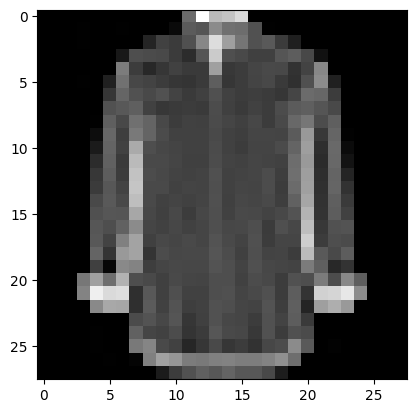

In [30]:
N = np.random.randint(10000)
print(labels[N])
plt.imshow(fmnist[N], cmap='gray')

In [31]:
enc = LabelBinarizer()
enc.fit(labels.reshape((10000,1)))
target = enc.transform(labels)
target

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
X = fmnist.reshape(10000,784).astype(float)
y = target[:,8]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [33]:
model = LogisticRegression(C=10,penalty='l2',tol=0.01,solver='saga')
model.fit(X_train,y_train)

LogisticRegression(C=10, solver='saga', tol=0.01)

In [34]:
predicted = model.predict(X_test)
confusion_matrix(y_test,predicted)

array([[2224,   27],
       [  21,  228]])

# Hyper-spectral Images

As we saw above, normal images have 3 channels: red, blue and green. [Hyper-spectral images](https://en.wikipedia.org/wiki/Hyperspectral_imaging) on the other hand, have many more channels each corresponding to a specfic band of electromagnetic spectrum. Most sattelite images are hyper-spectral. Here some hyper-spectral image sources:

## Some hyper-spectral image datasets

### Sattelite Images

1. [USGS Earth-Explorer](https://gisgeography.com/usgs-earth-explorer-download-free-landsat-imagery/)
1. [Next Generation Weather Radar Images Datasets](https://www.ncei.noaa.gov/products/radar/next-generation-weather-radar)
2. [Open Library for Earth Observations Machine Learning](https://mlhub.earth/)
3. [Grupo de Inteligencia Computacional de la Universidad del País Vasco (UPV/EHU)](https://www.ehu.eus/ccwintco/index.php?title=P%C3%A1gina_principal)
4. [A collection of hyperspectral images from Weebly](http://lesun.weebly.com/hyperspectral-data-set.html)
5. [Global Hyperspectral Imaging Spectral-library of Agricultural crops for Conterminous United States](https://catalog.data.gov/dataset/global-hyperspectral-imaging-spectral-library-of-agricultural-crops-for-conterminous-unite)

### Others

7. [Hyperspectral images of fruits](https://sites.google.com/site/hyperspectralcolorimaging/dataset/fruits)
6. [TokyoTech 31-band Hyperspectral Image Dataset](http://www.ok.sc.e.titech.ac.jp/res/MSI/MSIdata31.html)
7. [Real-World Hyperspectral Images Database](http://vision.seas.harvard.edu/hyperspec/d2x5g3/)
8. [Hyperspectral image dataset for salt stress phenotyping of wheat](https://conservancy.umn.edu/handle/11299/195720)


For example the image below [(Source)](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes) has 200 channels.

In [40]:
pine = loadmat('./data/Indian_pines_corrected.mat')
labels = loadmat('./data/Indian_pines_gt.mat')

pine['indian_pines_corrected'].shape

(145, 145, 200)

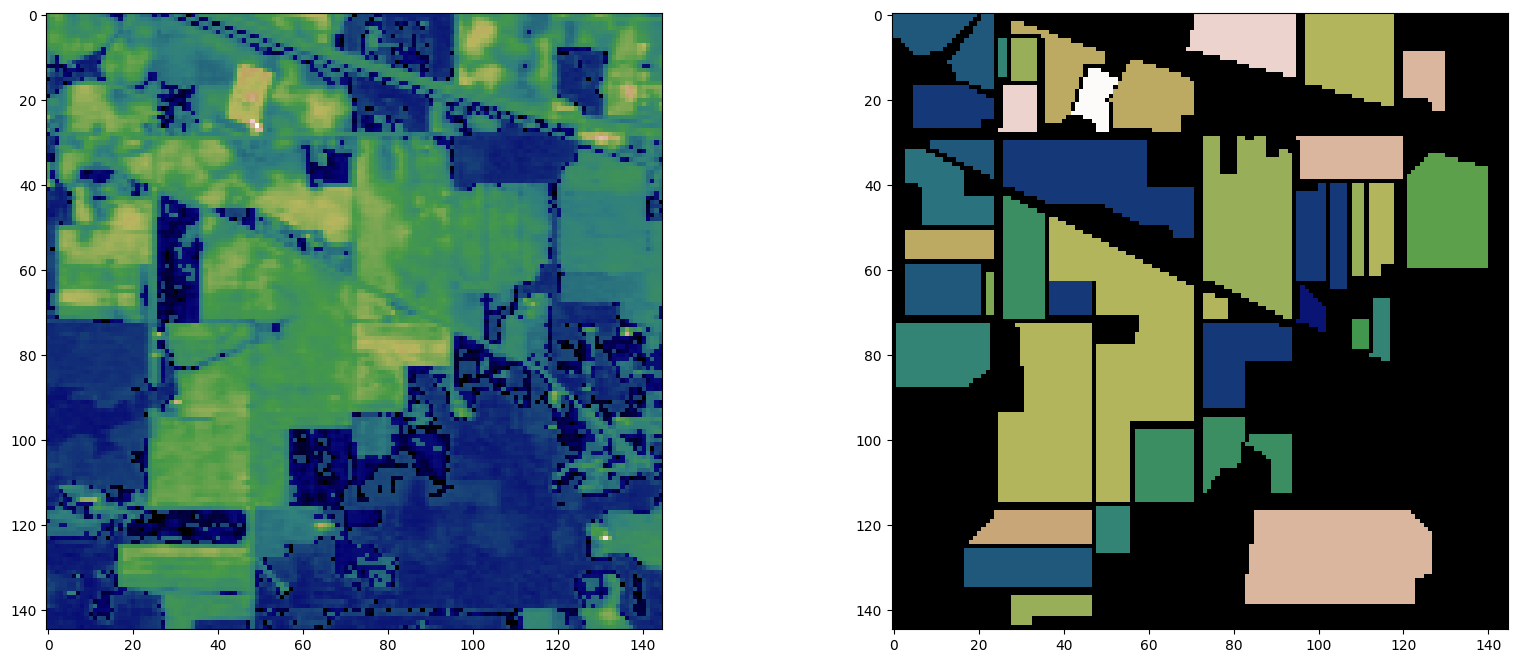

In [65]:
m = np.random.randint(200)

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
ax[0].imshow(pine['indian_pines_corrected'][:,:,m], cmap='gist_earth')
ax[1].imshow(labels['indian_pines_gt'], cmap='gist_earth')

In [74]:
X = pine['indian_pines_corrected'].reshape(145*145,200)
X.shape

(21025, 200)

In [84]:
enc = LabelBinarizer()
y = enc.fit_transform(labels['indian_pines_gt'].reshape(145*145))
y.shape

(21025, 17)

In [92]:
m = np.random.randint(17)
print(f'Predicting label {m}')

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.66)

model = LogisticRegression(max_iter=2500)
model.fit(X_train,y_train[:,m])
y_pred = model.predict(X_test)

confusion_matrix(y_test[:,m],y_pred)

Predicting label 0


/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2618,  859],
       [ 811, 2861]])